In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [107]:
df1 = pd.read_csv('/content/flights.csv')
df1.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [109]:
df1.drop(columns= ['tailnum'],inplace= True)

In [110]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,168387.500000,97219.001466,0.0,84193.75,168387.5,252581.25,336775.0
year,336776.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
month,336776.0,6.548510,3.414457,1.0,4.00,7.0,10.00,12.0
day,336776.0,15.710787,8.768607,1.0,8.00,16.0,23.00,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.00,1401.0,1744.00,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.00,1359.0,1729.00,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.00,-2.0,11.00,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.00,1535.0,1940.00,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.00,1556.0,1945.00,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.00,-5.0,14.00,1272.0


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [112]:
df1.shape

(336776, 20)

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [114]:
df1.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [115]:
(df1.isnull().sum()/df1.shape[0])*100

id                0.000000
year              0.000000
month             0.000000
day               0.000000
dep_time          2.451184
sched_dep_time    0.000000
dep_delay         2.451184
arr_time          2.587180
sched_arr_time    0.000000
arr_delay         2.800081
carrier           0.000000
flight            0.000000
origin            0.000000
dest              0.000000
air_time          2.800081
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
name              0.000000
dtype: float64

In [116]:
df1.isnull().sum().sum()

44083

In [117]:
(44083/336776)*100

13.089709480485546

In [118]:
# filling the null value of air_time with mean method
df1['air_time'].fillna(df1['air_time'].mean(),inplace = True)

In [119]:
# arr_delay fill the null value with the mode method because wait untill the possibility is there \
df1['arr_delay'].fillna(df1['arr_delay'].mode()[0],inplace = True)

In [120]:
# arr_time fill th null value with the mean method
df1['arr_time'].fillna(df1['arr_time'].mean(), inplace = True)

In [121]:
# dep_delay fill th null value with the mean method
df1['dep_delay'].fillna(df1['dep_delay'].mean(),inplace = True)

In [122]:
# dep_time null values are fill with the mode method
df1['dep_time'].fillna(df1['dep_time'].mode()[0],inplace = True)

In [123]:
# round the value to change the data types od the columns
df1['dep_time'] = df1['dep_time'].round()
df1['dep_time'] = df1['dep_time'].astype(int)

In [124]:
# round the number to change the datatype
df1['dep_delay'] = df1['dep_delay'].round()
df1['arr_time'] = df1['arr_time'].round()
df1['arr_delay'] = df1['arr_delay'].round()
df1['arr_time'] = df1['arr_time'].round()
df1['air_time'] = df1['air_time'].round()

In [125]:
df1['dep_delay'] = df1['dep_delay'].astype(int)
df1['arr_time'] = df1['arr_time'].astype(int)
df1['arr_delay'] = df1['arr_delay'].astype(int)
df1['arr_time'] = df1['arr_time'].astype(int)
df1['air_time'] = df1['air_time'].astype(int)

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              336776 non-null  int64 
 1   year            336776 non-null  int64 
 2   month           336776 non-null  int64 
 3   day             336776 non-null  int64 
 4   dep_time        336776 non-null  int64 
 5   sched_dep_time  336776 non-null  int64 
 6   dep_delay       336776 non-null  int64 
 7   arr_time        336776 non-null  int64 
 8   sched_arr_time  336776 non-null  int64 
 9   arr_delay       336776 non-null  int64 
 10  carrier         336776 non-null  object
 11  flight          336776 non-null  int64 
 12  origin          336776 non-null  object
 13  dest            336776 non-null  object
 14  air_time        336776 non-null  int64 
 15  distance        336776 non-null  int64 
 16  hour            336776 non-null  int64 
 17  minute          336776 non-nu

In [127]:
df1.year.unique()

array([2013])

In [128]:
# applying the one hot encoding
a_data = df1[['year']]
a_data
pd.get_dummies(a_data)
from sklearn.preprocessing import OneHotEncoder
b_data = OneHotEncoder()
c_data=b_data.fit_transform(a_data).toarray()
pd.DataFrame(c_data,columns = ["year"])
#df1['year'] = df1['year_'].inplace = True
df1 = pd.concat([df1, pd.DataFrame(c_data,columns = ["year"])], axis=1)
df1

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,origin,dest,air_time,distance,hour,minute,time_hour,name,year
0,0,2013,1,1,517,515,2,830,819,11,...,1545,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.,1.0
1,1,2013,1,1,533,529,4,850,830,20,...,1714,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.,1.0
2,2,2013,1,1,542,540,2,923,850,33,...,1141,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.,1.0
3,3,2013,1,1,544,545,-1,1004,1022,-18,...,725,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,JetBlue Airways,1.0
4,4,2013,1,1,554,600,-6,812,837,-25,...,461,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,555,1455,13,1502,1634,-13,...,3393,JFK,DCA,151,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.,1.0
336772,336772,2013,9,30,555,2200,13,1502,2312,-13,...,3525,LGA,SYR,151,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.,1.0
336773,336773,2013,9,30,555,1210,13,1502,1330,-13,...,3461,LGA,BNA,151,764,12,10,2013-09-30 12:00:00,Envoy Air,1.0
336774,336774,2013,9,30,555,1159,13,1502,1344,-13,...,3572,LGA,CLE,151,419,11,59,2013-09-30 11:00:00,Envoy Air,1.0


In [131]:
df1['year'] = df1['year'].astype(int)
df1.info()

KeyError: 'year'

In [130]:
# label encoding
from sklearn.preprocessing import LabelEncoder

z_data = LabelEncoder()
df1['name'] = z_data.fit_transform(df1['name'])

df1.drop(columns=['year'],inplace=True)

In [132]:
df1.head()

,id,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,1,1,517,515,2,830,819,11,UA,1545,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,14
1,1,1,1,533,529,4,850,830,20,UA,1714,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,14
2,2,1,1,542,540,2,923,850,33,AA,1141,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,2
3,3,1,1,544,545,-1,1004,1022,-18,B6,725,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,9
4,4,1,1,554,600,-6,812,837,-25,DL,461,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,3


In [133]:
df1['time_hour'] = z_data.fit_transform(df1['time_hour'])
df1['dest'] = z_data.fit_transform(df1['dest'])
df1['distance'] = z_data.fit_transform(df1['distance'])
df1['minute'] = z_data.fit_transform(df1['minute'])
df1['hour'] = z_data.fit_transform(df1['hour'])
df1['air_time'] = z_data.fit_transform(df1['air_time'])
df1['origin'] = z_data.fit_transform(df1['origin'])
df1['flight'] = z_data.fit_transform(df1['flight'])
df1['carrier'] = z_data.fit_transform(df1['carrier'])
df1['arr_delay'] = z_data.fit_transform(df1['arr_delay'])
df1['sched_arr_time'] = z_data.fit_transform(df1['sched_arr_time'])
df1['arr_time'] = z_data.fit_transform(df1['arr_time'])
df1['dep_delay'] = z_data.fit_transform(df1['dep_delay'])
df1['sched_dep_time'] = z_data.fit_transform(df1['sched_dep_time'])
df1['dep_time'] = z_data.fit_transform(df1['dep_time'])
df1['day'] = z_data.fit_transform(df1['day'])
df1['month'] = z_data.fit_transform(df1['month'])


In [134]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,168387.500000,97219.001466,0.0,84193.75,168387.5,252581.25,336775.0
month,336776.0,5.548510,3.414457,0.0,3.00,6.0,9.00,11.0
day,336776.0,14.710787,8.768607,0.0,7.00,15.0,22.00,30.0
dep_time,336776.0,688.142480,296.996822,0.0,411.00,706.0,934.00,1317.0
sched_dep_time,336776.0,486.614186,280.007068,0.0,216.00,509.0,719.00,1020.0
dep_delay,336776.0,43.598027,38.916846,0.0,26.00,30.0,44.00,526.0
arr_time,336776.0,883.748794,313.348754,0.0,640.00,888.0,1144.00,1410.0
sched_arr_time,336776.0,661.039454,287.226161,0.0,407.00,679.0,908.00,1162.0
arr_delay,336776.0,82.291755,43.448008,0.0,60.00,70.0,89.00,576.0
carrier,336776.0,6.142492,4.136184,0.0,3.00,5.0,11.00,15.0


<ipython-input-135-7b670b2a7065>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['arr_delay'])


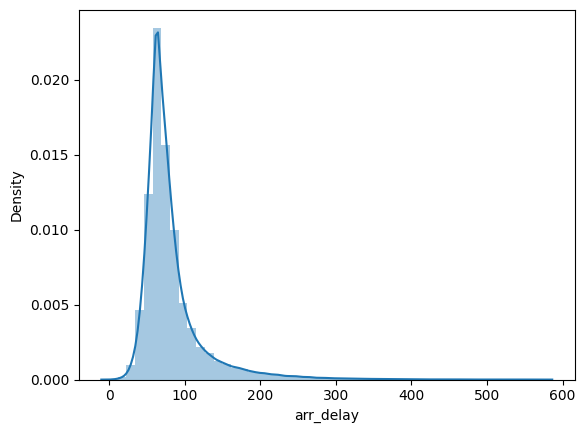

In [135]:
## analying the out layer
sns.distplot(df1['arr_delay'])
plt.show()

<ipython-input-136-6e18aaf9bd98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['air_time'])


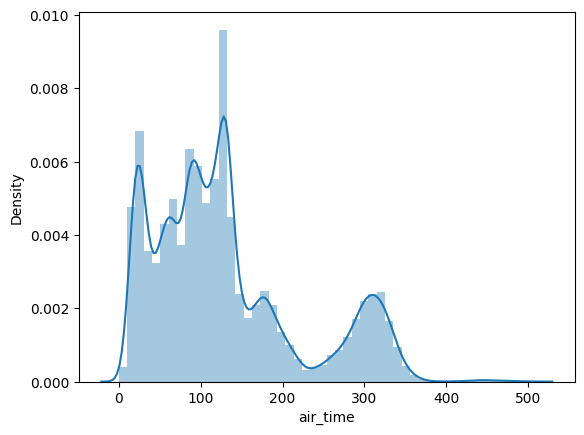

In [136]:
sns.distplot(df1['air_time'])
plt.show()

<ipython-input-137-22f3fcfbce17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['dep_delay'])


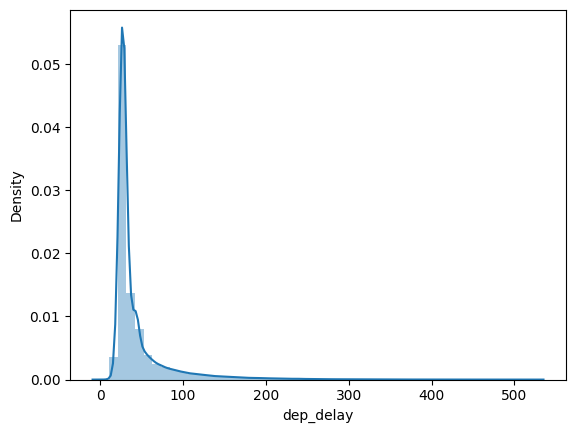

In [137]:
sns.distplot(df1['dep_delay'])
plt.show()

In [138]:
# removing the outlayer through the IQR    _____________ od dep_delay
q1 = df1['dep_delay'].quantile(0.25)
q3 = df1['dep_delay'].quantile(0.75)

IQR = q3-q1
IQR

min_range = q1-(1.5*IQR)
max_range = q1+(1.5*IQR)
min_range,max_range
new_data = df1[df1['dep_delay']<=max_range]

<ipython-input-139-22f3fcfbce17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['dep_delay'])


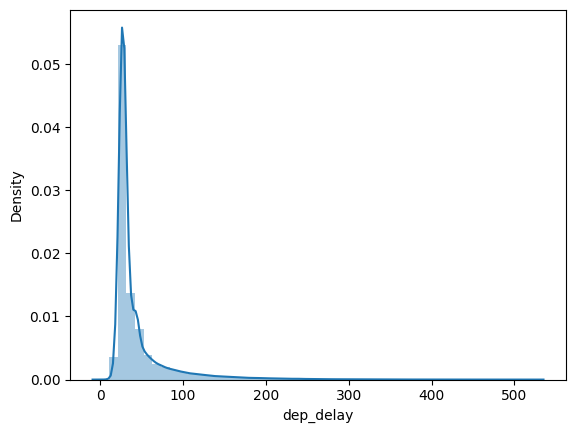

In [139]:
sns.distplot(df1['dep_delay'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

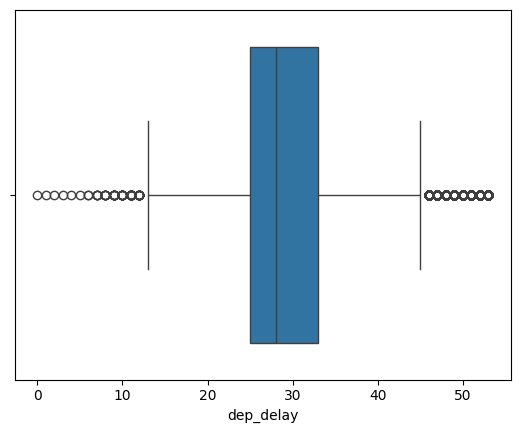

In [140]:
sns.boxplot(x = 'dep_delay',data = new_data)
plt.show

In [141]:
# removing the outlayer through the IQR
q1 = df1['air_time'].quantile(0.25)
q3 = df1['air_time'].quantile(0.75)

IQR = q3-q1
IQR

min_range = q1-(1.5*IQR)
max_range = q1+(1.5*IQR)
min_range,max_range
new_data = df1[df1['air_time']<=max_range]

In [142]:
# removing the outlayer through the IQR of ____________ arr_delay
q1 = df1['arr_delay'].quantile(0.25)
q3 = df1['arr_delay'].quantile(0.75)

IQR = q3-q1
IQR

min_range = q1-(1.5*IQR)
max_range = q1+(1.5*IQR)
min_range,max_range
new_data = df1[df1['arr_delay']<=max_range]

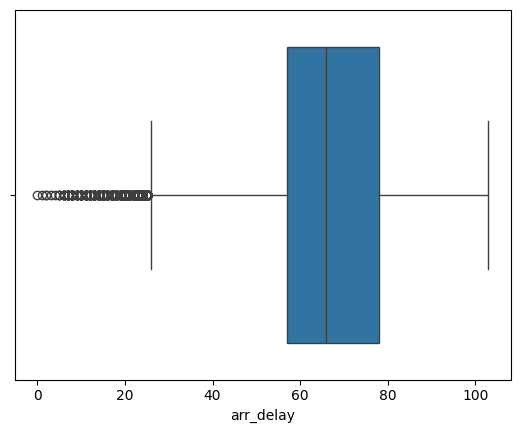

In [143]:
sns.boxplot(x = 'arr_delay', data = new_data)
plt.show()

In [146]:
df1.isnull().sum()

id                0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [145]:
df1.shape

(336776, 19)

In [ ]:
new_data.shape

(280921, 22)

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id              336776 non-null  int64
 1   month           336776 non-null  int64
 2   day             336776 non-null  int64
 3   dep_time        336776 non-null  int64
 4   sched_dep_time  336776 non-null  int64
 5   dep_delay       336776 non-null  int64
 6   arr_time        336776 non-null  int64
 7   sched_arr_time  336776 non-null  int64
 8   arr_delay       336776 non-null  int64
 9   carrier         336776 non-null  int64
 10  flight          336776 non-null  int64
 11  origin          336776 non-null  int64
 12  dest            336776 non-null  int64
 13  air_time        336776 non-null  int64
 14  distance        336776 non-null  int64
 15  hour            336776 non-null  int64
 16  minute          336776 non-null  int64
 17  time_hour       336776 non-null  int64
 18  name

In [149]:
# feature scaling (Standardization) of air_time
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df1[['air_time']])
ss.transform(df1[['air_time']])

df1['air_time']=pd.DataFrame(ss.transform(df1[['air_time']]),columns = ['x'])



In [150]:
# feature scaling (Standardization) of dep_delay
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df1[['dep_delay']])
ss.transform(df1[['dep_delay']])

df1['dep_delay']=pd.DataFrame(ss.transform(df1[['dep_delay']]),columns = ['x'])

In [151]:
## feature scaling (Standardization) of arr_delay
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df1[['arr_delay']])
ss.transform(df1[['arr_delay']])

df1['arr_delay']=pd.DataFrame(ss.transform(df1[['arr_delay']]),columns = ['x'])

In [152]:
#feature scaler (normalization) of air_time
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df1[['air_time']])
ms.transform(df1[['air_time']])
df1['air_time_min'] = ms.transform(df1[['air_time']])

In [153]:
#feature scaler (normalization) of dep_delay
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df1[['dep_delay']])
ms.transform(df1[['dep_delay']])
df1['dep_delay_min'] = ms.transform(df1[['dep_delay']])

In [154]:
#feature scaler (normalization) of arr_delay
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df1[['arr_delay']])
ms.transform(df1[['arr_delay']])
df1['arr_delay_min'] = ms.transform(df1[['arr_delay']])

In [155]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,1.683875e+05,97219.001466,0.000000,84193.750000,168387.500000,252581.250000,336775.000000
month,336776.0,5.548510e+00,3.414457,0.000000,3.000000,6.000000,9.000000,11.000000
day,336776.0,1.471079e+01,8.768607,0.000000,7.000000,15.000000,22.000000,30.000000
dep_time,336776.0,6.881425e+02,296.996822,0.000000,411.000000,706.000000,934.000000,1317.000000
sched_dep_time,336776.0,4.866142e+02,280.007068,0.000000,216.000000,509.000000,719.000000,1020.000000
dep_delay,336776.0,-1.029601e-17,1.000001,-1.120288,-0.452196,-0.349413,0.010329,12.395729
arr_time,336776.0,8.837488e+02,313.348754,0.000000,640.000000,888.000000,1144.000000,1410.000000
sched_arr_time,336776.0,6.610395e+02,287.226161,0.000000,407.000000,679.000000,908.000000,1162.000000
arr_delay,336776.0,1.616980e-16,1.000001,-1.894031,-0.513068,-0.282908,0.154397,11.363213
carrier,336776.0,6.142492e+00,4.136184,0.000000,3.000000,5.000000,11.000000,15.000000


In [156]:
# handling duplicate data
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
336771    False
336772    False
336773    False
336774    False
336775    False
Length: 336776, dtype: bool

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        336776 non-null  int64  
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       336776 non-null  float64
 6   arr_time        336776 non-null  int64  
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       336776 non-null  float64
 9   carrier         336776 non-null  int64  
 10  flight          336776 non-null  int64  
 11  origin          336776 non-null  int64  
 12  dest            336776 non-null  int64  
 13  air_time        336776 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [158]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,1.683875e+05,97219.001466,0.000000,84193.750000,168387.500000,252581.250000,336775.000000
month,336776.0,5.548510e+00,3.414457,0.000000,3.000000,6.000000,9.000000,11.000000
day,336776.0,1.471079e+01,8.768607,0.000000,7.000000,15.000000,22.000000,30.000000
dep_time,336776.0,6.881425e+02,296.996822,0.000000,411.000000,706.000000,934.000000,1317.000000
sched_dep_time,336776.0,4.866142e+02,280.007068,0.000000,216.000000,509.000000,719.000000,1020.000000
dep_delay,336776.0,-1.029601e-17,1.000001,-1.120288,-0.452196,-0.349413,0.010329,12.395729
arr_time,336776.0,8.837488e+02,313.348754,0.000000,640.000000,888.000000,1144.000000,1410.000000
sched_arr_time,336776.0,6.610395e+02,287.226161,0.000000,407.000000,679.000000,908.000000,1162.000000
arr_delay,336776.0,1.616980e-16,1.000001,-1.894031,-0.513068,-0.282908,0.154397,11.363213
carrier,336776.0,6.142492e+00,4.136184,0.000000,3.000000,5.000000,11.000000,15.000000


In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        336776 non-null  int64  
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       336776 non-null  float64
 6   arr_time        336776 non-null  int64  
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       336776 non-null  float64
 9   carrier         336776 non-null  int64  
 10  flight          336776 non-null  int64  
 11  origin          336776 non-null  int64  
 12  dest            336776 non-null  int64  
 13  air_time        336776 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [162]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func = np.log1p)

ft.fit(df1[['air_time']])
ft.transform(df1[['air_time']])
df1['air_time_tf'] = ft.transform(df1[['air_time']])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [163]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281305 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id              281305 non-null  int64
 1   month           281305 non-null  int64
 2   day             281305 non-null  int64
 3   dep_time        281305 non-null  int64
 4   sched_dep_time  281305 non-null  int64
 5   dep_delay       281305 non-null  int64
 6   arr_time        281305 non-null  int64
 7   sched_arr_time  281305 non-null  int64
 8   arr_delay       281305 non-null  int64
 9   carrier         281305 non-null  int64
 10  flight          281305 non-null  int64
 11  origin          281305 non-null  int64
 12  dest            281305 non-null  int64
 13  air_time        281305 non-null  int64
 14  distance        281305 non-null  int64
 15  hour            281305 non-null  int64
 16  minute          281305 non-null  int64
 17  time_hour       281305 non-null  int64
 18  name     

In [166]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,336776.0,1.683875e+05,97219.001466,0.000000,84193.750000,168387.500000,252581.250000,336775.000000
month,336776.0,5.548510e+00,3.414457,0.000000,3.000000,6.000000,9.000000,11.000000
day,336776.0,1.471079e+01,8.768607,0.000000,7.000000,15.000000,22.000000,30.000000
dep_time,336776.0,6.881425e+02,296.996822,0.000000,411.000000,706.000000,934.000000,1317.000000
sched_dep_time,336776.0,4.866142e+02,280.007068,0.000000,216.000000,509.000000,719.000000,1020.000000
dep_delay,336776.0,-1.029601e-17,1.000001,-1.120288,-0.452196,-0.349413,0.010329,12.395729
arr_time,336776.0,8.837488e+02,313.348754,0.000000,640.000000,888.000000,1144.000000,1410.000000
sched_arr_time,336776.0,6.610395e+02,287.226161,0.000000,407.000000,679.000000,908.000000,1162.000000
arr_delay,336776.0,1.616980e-16,1.000001,-1.894031,-0.513068,-0.282908,0.154397,11.363213
carrier,336776.0,6.142492e+00,4.136184,0.000000,3.000000,5.000000,11.000000,15.000000


In [ ]:
new_data.shape

(280921, 22)